In [29]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import utils

In [30]:
ROOT = r"C:\Users\ihett\OneDrive\Gabrilyi\leaflet_project\labeled\2_Ilyi_10102024"
IMAGE_DIR = os.path.join(ROOT, "images")
LABEL_DIR = os.path.join(ROOT, "labels")

In [31]:
image_path = os.path.join(IMAGE_DIR, os.listdir(IMAGE_DIR)[16])
label_path = os.path.join(LABEL_DIR, os.listdir(LABEL_DIR)[16])

image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image file '{image_path}' not found.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [32]:
polygons = utils.read_polygons(label_path)
print(polygons)

[(1, array([[ 66.85236769,  59.42432683],
       [642.52553389,  59.42432683],
       [642.52553389, 627.66945218],
       [ 66.85236769, 627.66945218]])), (1, array([[ 687.09377902,   59.42432683],
       [1413.18477252,   59.42432683],
       [1413.18477252,  631.38347261],
       [ 687.09377902,  631.38347261]])), (1, array([[  51.99628598,  956.36025998],
       [ 759.51717734,  956.36025998],
       [ 759.51717734, 1428.04085422],
       [  51.99628598, 1428.04085422]])), (1, array([[ 794.8003714 ,  999.07149489],
       [1405.75673166,  999.07149489],
       [1405.75673166, 1873.72330548],
       [ 794.8003714 , 1873.72330548]])), (1, array([[  57.56731662, 1402.04271123],
       [ 761.37418756, 1402.04271123],
       [ 761.37418756, 1907.14948932],
       [  57.56731662, 1907.14948932]])), (1, array([[1149.48932219, 1056.63881151],
       [1197.77158774, 1023.21262767],
       [1227.48375116,  898.79294336],
       [1201.48560817,  742.80408542],
       [1032.49767874,  633.2404

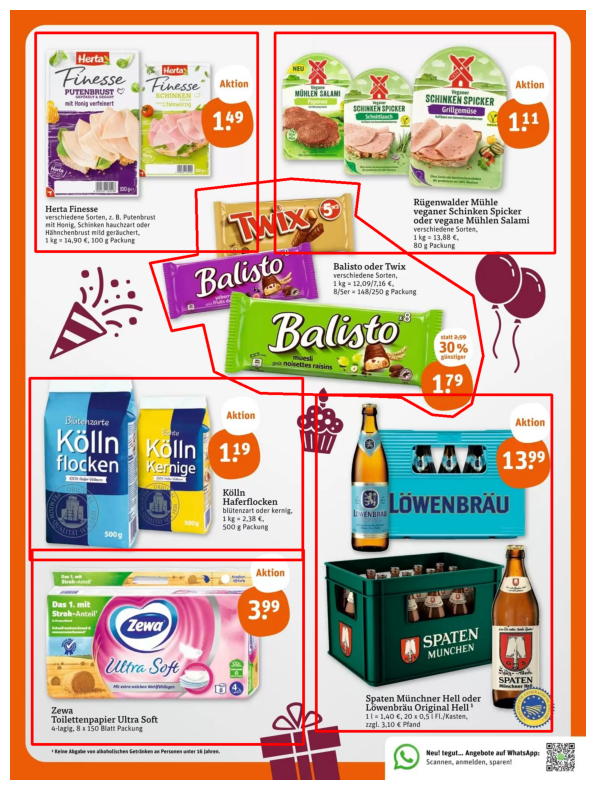

In [33]:
plot_img = image.copy()
for class_id, polygon in polygons:
    points = polygon.astype(int)
    cv2.polylines(plot_img, [points], isClosed=True, color=(255,0,0), thickness=5)

# Display the image with annotations
plt.figure(figsize=(10, 10))
plt.imshow(plot_img)
plt.axis('off')
plt.show()

In [34]:
def extract_polygons(image, polygons):
    """
    Extracts and crops regions defined by polygons from an image.

    Args:
        image (numpy.ndarray): The source image.
        polygons (list): A list of tuples, where each tuple contains a class ID and a polygon 
                         (as a numpy array of normalized coordinates).

    Returns:
        list: A list of cropped images containing the extracted polygons.
    """
    results = []
    for class_id, polygon in polygons:
        points = polygon.astype(int)

        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.fillPoly(mask, [points], color=255)
        extracted = cv2.bitwise_and(image, image, mask=mask)

        x, y, w, h = cv2.boundingRect(points)

        cropped = extracted[y:y+h, x:x+w]
        results.append(cropped)

    return results


extracted = extract_polygons(image, polygons)

## OCR

In [35]:
import easyocr
reader = easyocr.Reader(['de','en'])


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


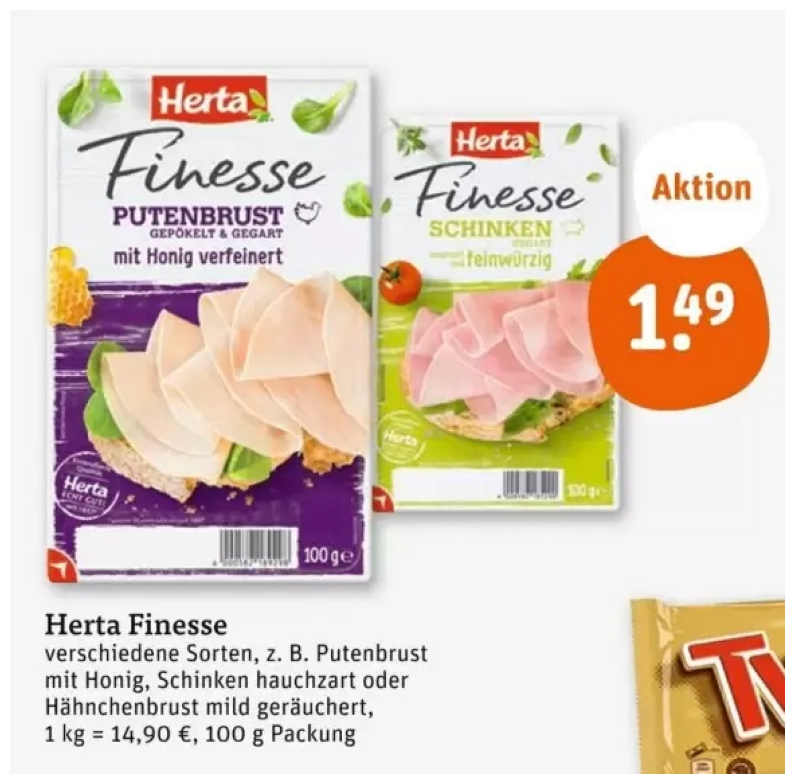

['Herta', 'HHerta', 'Fiesse', 'Finesse', 'Aktion', 'PUTENBRUST', 'GePokcit', 'GEGART', 'SCHINKEN', 'mit Honig verfeinert', 'feinwurzig', '149', '1OOge', 'Herta Finesse', 'verschiedene Sorten, z. B. Putenbrust', 'mit Honig, Schinken hauchzart oder', '1G', 'Hähnchenbrust mild geräuchert,', 'kg', '14,90 €, 100 g Packung', 'Herg']


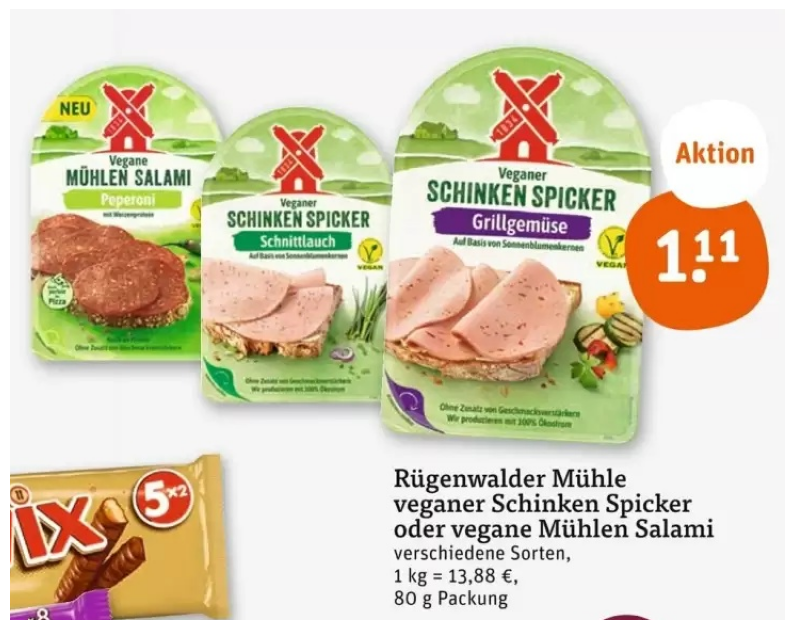

['NEU', 'Vegane', 'Aktion', 'MuHLEN SALAMI', 'Veganer', 'Pcperenl', 'SCHINKEN SPICKER', 'SCHINKEN SPICKER', 'Grillgemüse', 'Schniutlauch', '141', 'Rügenwalder Mühle', 'veganer Schinken Spicker', '1xs', 'oder vegane Mühlen Salami', 'verschiedene Sorten,', 'kg', '13,88 €,', '80 g Packung']


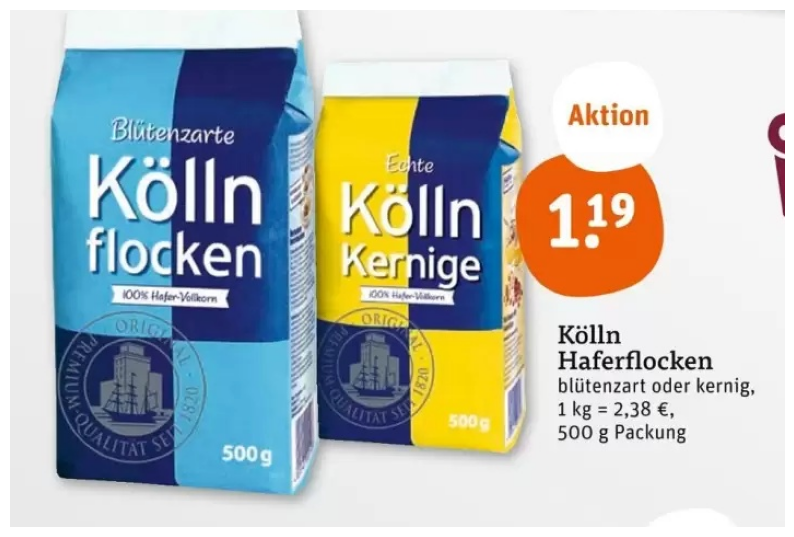

['Aktion', 'Blitenzarte', 'nte', 'Kölln', 'Kölln', '119', 'flogken', 'Kernige', 'HOOx Maler Vanorn', 'co', '0Re;', 'Kölln', 'Haferflocken', 'blütenzart oder kernig,', '1 kg', '2,38 €', 'SE', '500 g Packung', 's00g', 'L', 'oo', 'Alitas']


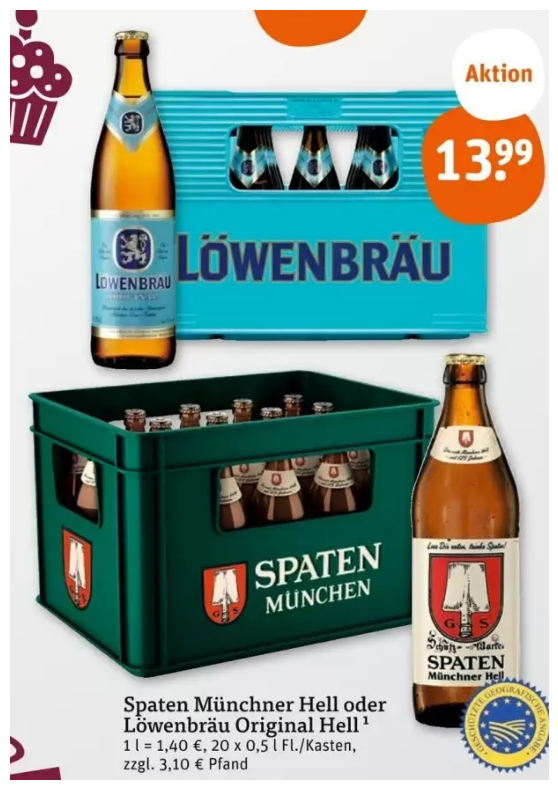

['Aktion', '1399', 'LowENBRAU', 'LÖwENBRÄU', 'culer.', 'SPATEN', 'Munchncr Hc', 'Spaten Münchner Hell oder', 'Löwenbräu Original Hell', '1 / = 1,40 €, 20 x 0,5 ( Fl/Kasten,', 'zzgl. 3,10 € Pfand', 'SPATEN', 'MUNCHEN', 'S0 n']


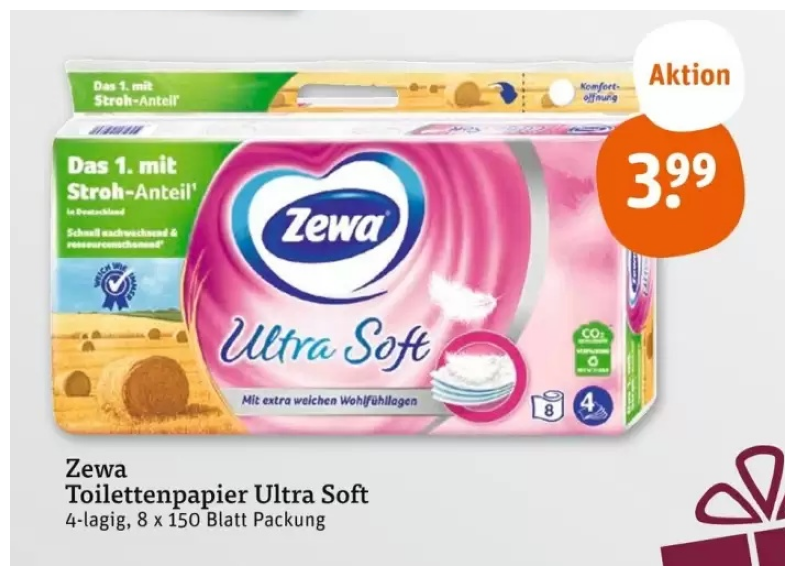

['Daa 1', 'Aktion', 'Stron-Anteir', 'Das 1 mit', "Streh-Anteil'", '399', 'Zewa', 'Ultra Sofe', 'MIt atra wcichcn Wohlfuhllagco', 'Zewa', 'Toilettenpapier Ultra Soft', '4-lagig, 8 x 150 Blatt Packung']


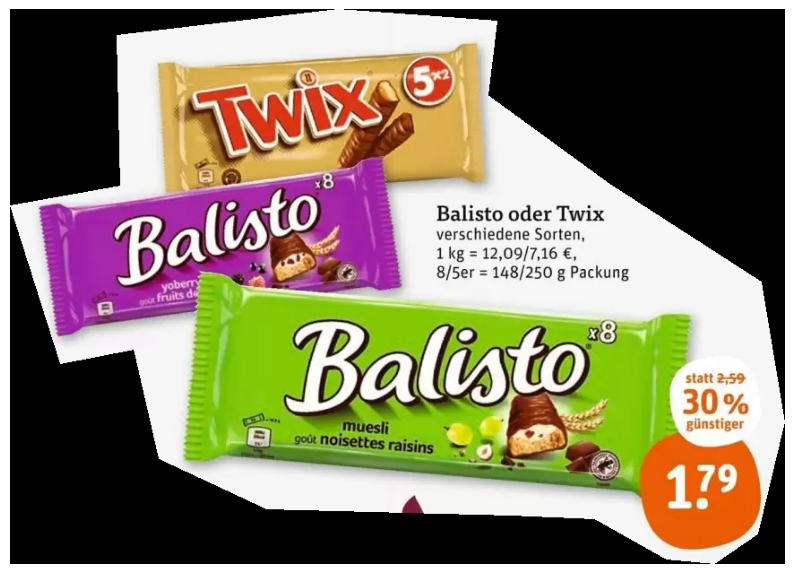

['Balisto oder Twix', 'verschiedene Sorten,', '1 kg', '12,09/7,16 €,', '8/5er', '148/250 g Packung', 'vober', 'fruits de', 'Balisto', 'statt 2,59', '30%', 'muesli', 'günstiger', 'gout', 'noisettes raisins', '179', 'IMIXS', 'Balisto']


In [36]:
for i, ext in enumerate(extracted):
    plt.figure(figsize=(10, 10))
    plt.imshow(ext)
    plt.axis('off')
    plt.show()
    result = reader.readtext(ext, detail=0)
    print(result)

In [39]:
# from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-printed")
# model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-printed")

# for i, ext in enumerate(extracted):
#     plt.figure(figsize=(10, 10))
#     plt.imshow(ext)
#     plt.axis('off')
#     plt.show()
#     pixel_values = processor(ext, return_tensors="pt").pixel_values
#     generated_ids = model.generate(pixel_values)
#     generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
#     print(generated_text)



## LLM

In [61]:
SYSTEM_PROMPT=r"""


  You are an intelligent assistant trained to process supermarket OCR results and map them into structured data fields for database storage. Here are the keys you must extract, along with their descriptions:

  1. **Item Name**: Extract the main product name, ignoring promotional words or descriptive terms.
  2. **Variants/Flavors**: Identify any specific flavors, variants, or descriptions (e.g., *noisettes raisins*).
  3. **Package Size**: Extract the size or units of the product package (e.g., *148/250 g Packung*).
  4. **Unit Price**: If a price per unit (e.g., *per kg/liter*) is mentioned, extract it.
  5. **Discounted Price**: Extract the discounted price (usually numeric with € or other currency symbols).
  6. **Original Price**: If available, extract the original price before the discount.
  7. **Discount Percentage**: Extract the percentage discount (e.g., *30% günstiger*).
  8. **Discount Type**: Identify the type of discount (e.g., *price reduction*, *bulk offer*).
  9. **Package Content**: If applicable, extract pack content details (e.g., *8/5er*).
  10. **Applicable Variants**: Identify if the offer applies to multiple variations (*verschiedene Sorten*).
  11. **Offer Validity**: Extract validity dates if provided (e.g., *valid from DD/MM to DD/MM*).
  12. **Brand Name**: Extract the brand name of the product.
  13. **Store Name**: Identify the supermarket if explicitly mentioned.
  14. **Promotion Label**: Extract promotional terms or labels (e.g., *statt*, *günstiger*).
  15. **Additional Notes**: Include miscellaneous descriptive text not captured by other keys.

  **Instructions**: 
  1. Parse the provided OCR result and clean up any noisy text or unrelated terms.
  2. Map the information into the above keys.
  3. If a key cannot be filled due to missing information, leave it blank.
  4. If the OCR text is unclear, infer the most logical value, but note it as "inferred." Often, the prices miss the currency symbol and decimal point. Use your best judgment to infer the correct value.
  5. Finally, if the price is missing, calculate it based on the unit price and package size.

  **Example Input**:
  OCR Result: ['Balisto oder Twix', 'verschiedene Sorten,', '1 kg', '12,09/7,16 €,', '8/5er', '148/250 g Packung', 'vober', 'fruits de', 'Balisto', 'statt 2,59', '30%', 'muesli', 'günstiger', 'gout', 'noisettes raisins', '179', 'IMIXS', 'Balisto']

  **Example Output**:
  ```json
  {
    "Item Name": "Balisto oder Twix",
    "Variants/Flavors": "noisettes raisins",
    "Package Size": "148/250 g Packung",
    "Unit Price": "12,09/7,16 €/kg",
    "Discounted Price": "1,79 €",
    "Original Price": "2,59 €",
    "Discount Percentage": "30%",
    "Discount Type": "Price Drop",
    "Package Content": "8/5er",
    "Applicable Variants": "verschiedene Sorten",
    "Offer Validity": "",
    "Brand Name": "Balisto",
    "Store Name": "",
    "Promotion Label": "günstiger",
    "Additional Notes": "muesli, gout"
  }
  ```

    
"""


In [62]:
# Example: reuse your existing OpenAI setup
from openai import OpenAI

# Point to the local server
client = OpenAI(base_url="http://localhost:5000/v1", api_key="lm-studio")

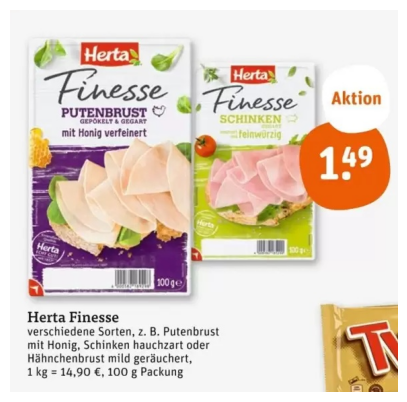

{
  "Item Name": "Herta Finesse",
  "Variants/Flavors": "mit Honig verfeinert, feinwurzig, Putenbrust, Schinken hauchzart oder Hähnchenbrust mild geräuchert",
  "Package Size": "100 g Packung",
  "Unit Price": "14.90 €/kg",
  "Discounted Price": "",
  "Original Price": "",
  "Discount Percentage": "",
  "Discount Type": "",
  "Package Content": "",
  "Applicable Variants": "verschiedene Sorten, z. B. Putenbrust",
  "Offer Validity": "",
  "Brand Name": "Herta",
  "Store Name": "",
  "Promotion Label": "Aktion",
  "Additional Notes": ""
}


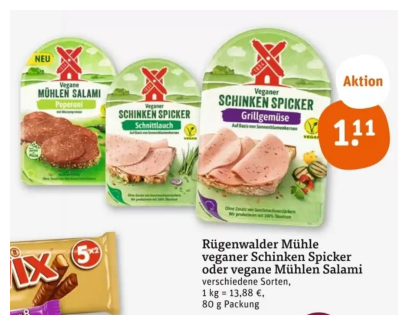

{
  "Item Name": "MuHLEN SALAMI oder SCHINKEN SPICKER",
  "Variants/Flavors": "veganer Schinken Spicker, vegane Mühlen Salami, Grillgemüse, Schniutlauch",
  "Package Size": "80 g Packung",
  "Unit Price": "13,88 €/kg (inferred)",
  "Discounted Price": "",
  "Original Price": "",
  "Discount Percentage": "",
  "Discount Type": "",
  "Package Content": "",
  "Applicable Variants": "verschiedene Sorten",
  "Offer Validity": "",
  "Brand Name": "Rügenwalder Mühle",
  "Store Name": "",
  "Promotion Label": "NEU, Aktion, veganer",
  "Additional Notes": ""
}


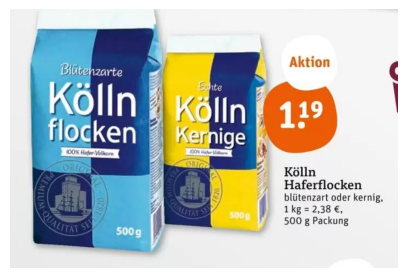

{
  "Item Name": "Blitenzarte Haferflocken",
  "Variants/Flavors": "blütenzart oder kernig",
  "Package Size": "500 g Packung",
  "Unit Price": "2,38 €/kg", // Inferred unit price
  "Discounted Price": "",
  "Original Price": "",
  "Discount Percentage": "",
  "Discount Type": "",
  "Package Content": "",
  "Applicable Variants": "",
  "Offer Validity": "",
  "Brand Name": "HOOx Maler Vanorn",
  "Store Name": "Kölln",
  "Promotion Label": "Aktion",
  "Additional Notes": ""
}


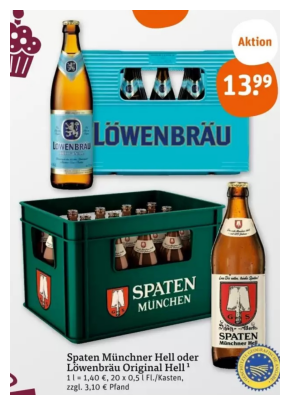

{
    "Item Name": "Löwenbräu Original Hell oder Spaten Münchner Hell",
    "Variants/Flavors": "",
    "Package Size": "20 x 0,5 l ( Flaschen/Kasten)",
    "Unit Price": "1,40 €/l",
    "Discounted Price": "1.40", // Inferred price without currency symbol
    "Original Price": "",
    "Discount Percentage": "",
    "Discount Type": "", 
    "Package Content": "",
    "Applicable Variants": "",
    "Offer Validity": "",
    "Brand Name": "Löwenbräu",
    "Store Name": "S0 n", // Assuming this is the store name
    "Promotion Label": "Aktion 1399",
    "Additional Notes": ""
}


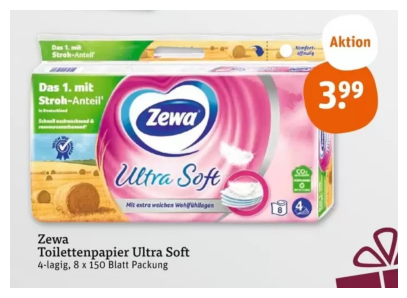

{
    "Item Name": "Toilettenpapier Ultra Soft",
    "Variants/Flavors": "",
    "Package Size": "4-lagig, 8 x 150 Blatt Packung",
    "Unit Price": "",
    "Discounted Price": "399",
    "Original Price": "",
    "Discount Percentage": "",
    "Discount Type": "",
    "Package Content": "",
    "Applicable Variants": "",
    "Offer Validity": "",
    "Brand Name": "Zewa",
    "Store Name": "",
    "Promotion Label": "Aktion, Stron-Anteir, Das 1 mit Streh-Anteil'",
    "Additional Notes": "Mit atra wcichcn Wohlfuhllagco"
}


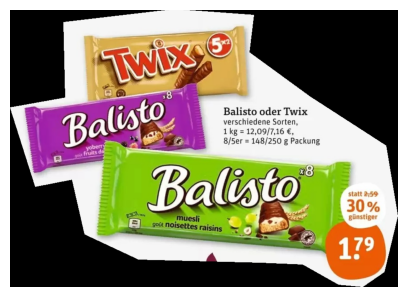

{
  "Item Name": "Balisto oder Twix",
  "Variants/Flavors": "noisettes raisins",
  "Package Size": "148/250 g Packung",
  "Unit Price": "12,09/7,16 €/kg", // inferred unit price based on package size and price
  "Discounted Price": "1.79 €", // removed the trailing '179' from the OCR result
  "Original Price": "2.59 €",
  "Discount Percentage": "30%",
  "Discount Type": "Price Drop",
  "Package Content": "8/5er",
  "Applicable Variants": "verschiedene Sorten",
  "Offer Validity": "",
  "Brand Name": "Balisto",
  "Store Name": "", // IMIXS is likely a store name, but it's not explicitly mentioned as such in the OCR result
  "Promotion Label": "günstiger",
  "Additional Notes": "muesli, gout"
}


In [63]:
for i, ext in enumerate(extracted):
    plt.figure(figsize=(5, 5))
    plt.imshow(ext)
    plt.axis('off')
    plt.show()
    result = reader.readtext(ext, detail=0)
    completion = client.chat.completions.create(
      model="lmstudio-community/Meta-Llama-3.1-8B-Instruct-GGUF",
      messages=[
        {"role": "system", "content": SYSTEM_PROMPT},
        {"role": "user", "content": f"<DIV>\n OCR result:{result}\n**Your Turn**: Based on the OCR result provided, generate the mapped keys as JSON."},
      ],
      temperature=0.3,
    )
    # print(completion.choices[0].message.content)
    import re
    json_content = re.search(r"\{(?:[^{}])*\}", completion.choices[0].message.content)
    if json_content:
        print(json_content.group(0))
    else:
        print(completion.choices[0].message.content) 